# Name: Harini S

## Simple Linear Regression
In statistics, linear regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). The case of one explanatory variable is called simple linear regression.

# Task 1

### Importing all the required Libraries

In [ ]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

from sklearn.linear_model import LinearRegression  
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

%matplotlib inline

In [4]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


# Histogram Plot
A histogram is a graphical representation that organizes a group of data points into user-specified ranges. It is similar in appearance to a bar graph. The histogram condenses a data series into an easily interpreted visual by taking many data points and grouping them into logical ranges or bins.

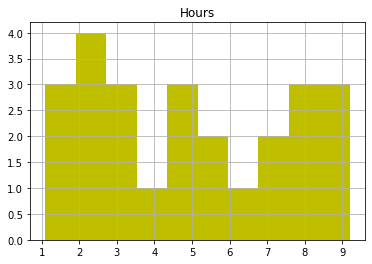

In [25]:
plt.hist(data["Hours"], color = "y")
plt.grid()
plt.title("Hours")
plt.show()

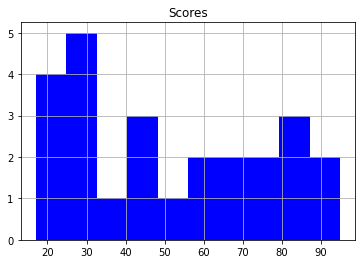

In [27]:
plt.hist(data["Scores"], color = "b")
plt.grid()
plt.title("Scores")
plt.show()

# Correlation

Correlation is used to test relationships between quantitative variables or categorical variables.

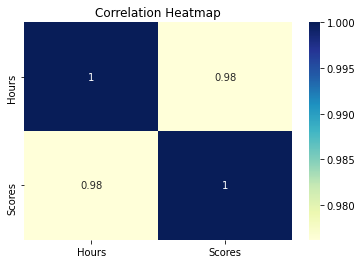

In [39]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.title("Correlation Heatmap")
plt.show()

# Scatterplot

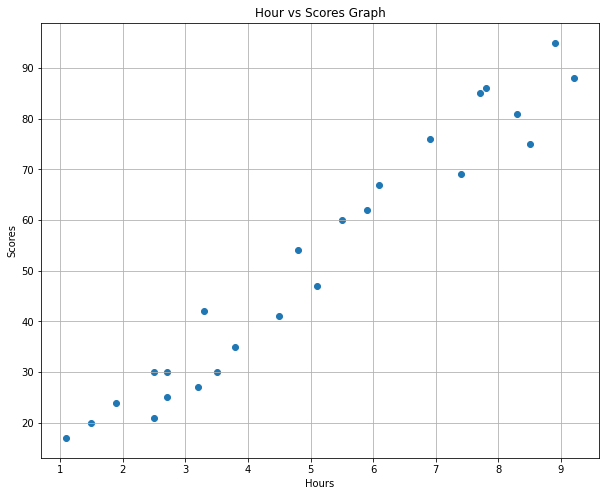

In [10]:
plt.figure(figsize = (10,8))
plt.scatter(data["Hours"], data["Scores"])
plt.grid()
plt.title("Hour vs Scores Graph")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

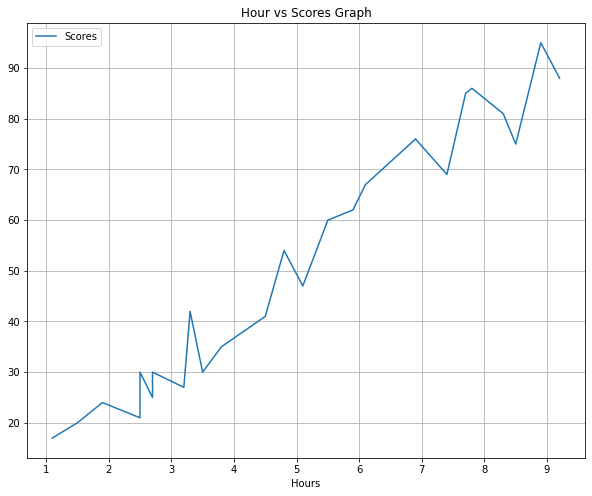

In [11]:
data2 = data.sort_values(['Hours', 'Scores'])
data2.plot(x = "Hours", y = "Scores", figsize = (10,8), grid = True)
plt.title("Hour vs Scores Graph")
plt.show()

In [40]:
X = data.iloc[:,0].values.reshape(-1,1)
y = data.iloc[:,1].values

array([[<AxesSubplot:title={'center':'Hours'}>,
        <AxesSubplot:title={'center':'Scores'}>]], dtype=object)

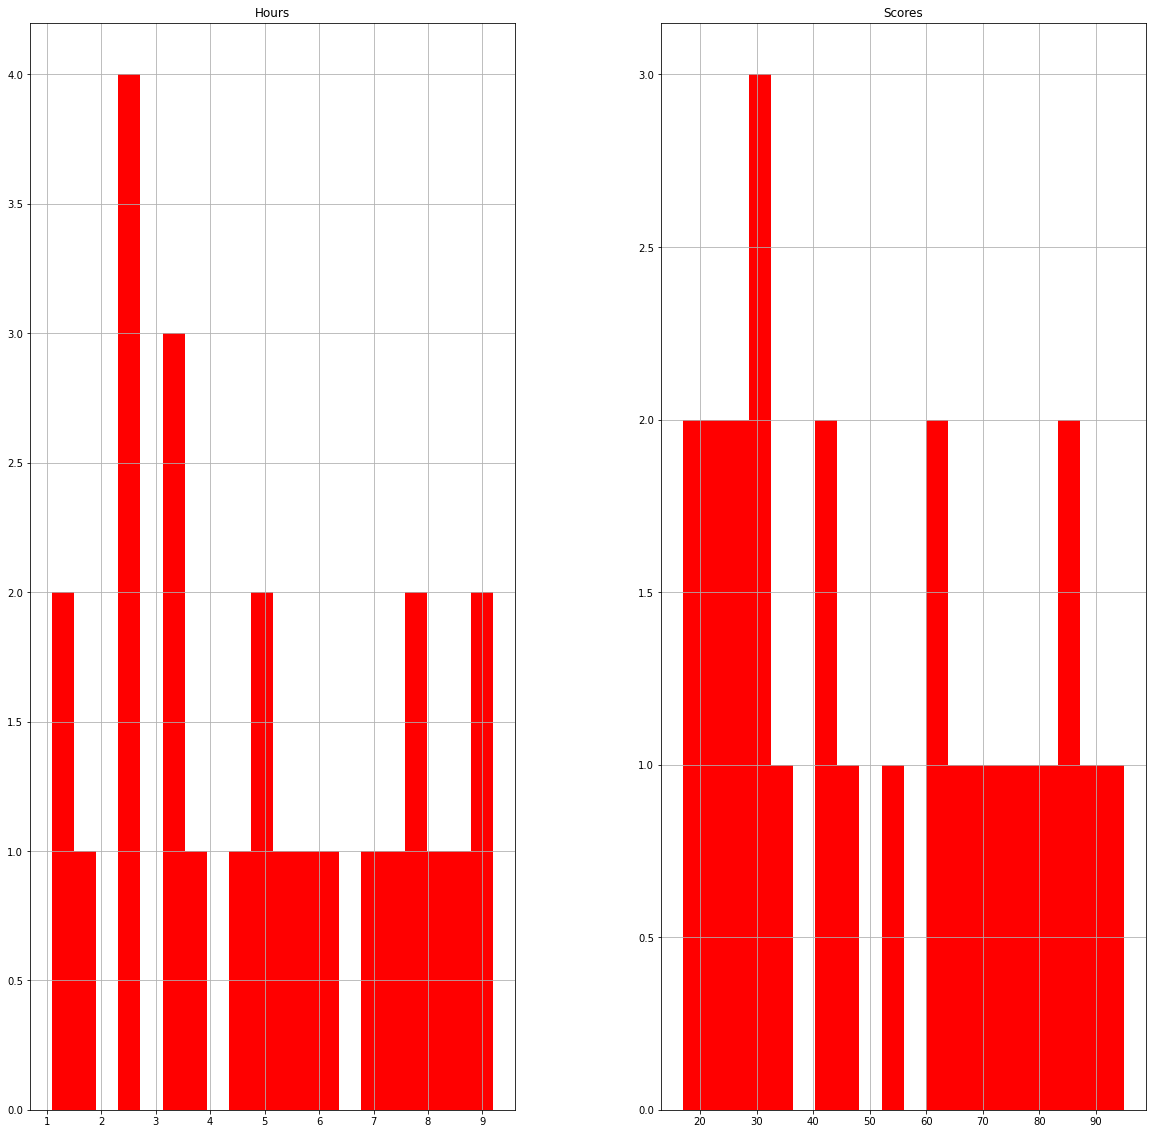

In [41]:
data.hist(bins=20,figsize=(20,20),color='red')

# Distplot

<AxesSubplot:xlabel='Scores'>

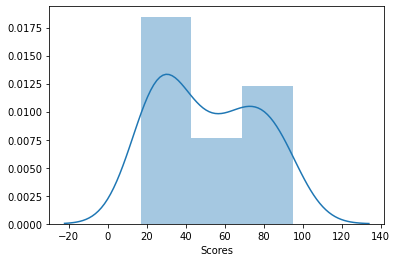

In [42]:
sns.distplot(data['Scores'])

# Pairplot

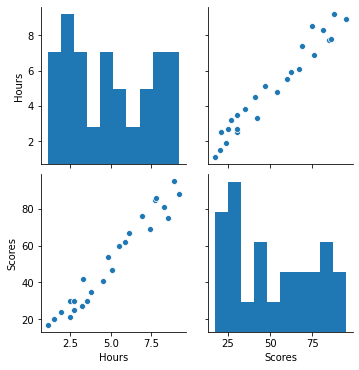

In [28]:
sns.pairplot(data)

# Boxplot

<AxesSubplot:xlabel='Hours'>

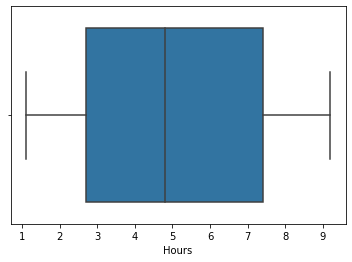

In [32]:
sns.boxplot(x='Hours',data=data)

<AxesSubplot:xlabel='Scores'>

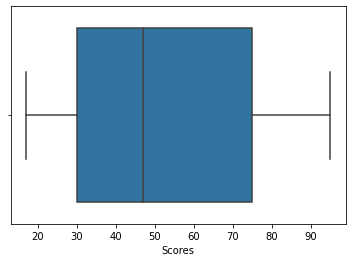

In [33]:
sns.boxplot(x='Scores',data=data)

# Preparing the Data

In [43]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2,random_state=0)

In [45]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

print(x)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [47]:
print(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


# import scikit learn and train  and test the x and y

In [48]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2,random_state=0)


# Training the Algorithm

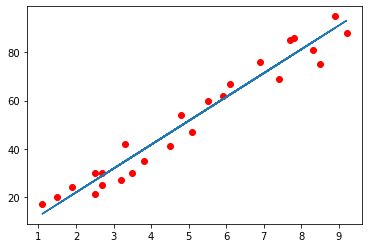

In [49]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
linear.fit(x_train,y_train)

line=linear.coef_*x+linear.intercept_
plt.scatter(x,y,color='red')
plt.plot(x,line)
plt.show()

In [37]:
y_pred=linear.predict(x_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

# Correlation of data

In [38]:
Y_compare_linear = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
Y_compare_linear.head() 

corr=data.corr()
corr.style.background_gradient(cmap="inferno")


,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<AxesSubplot:>

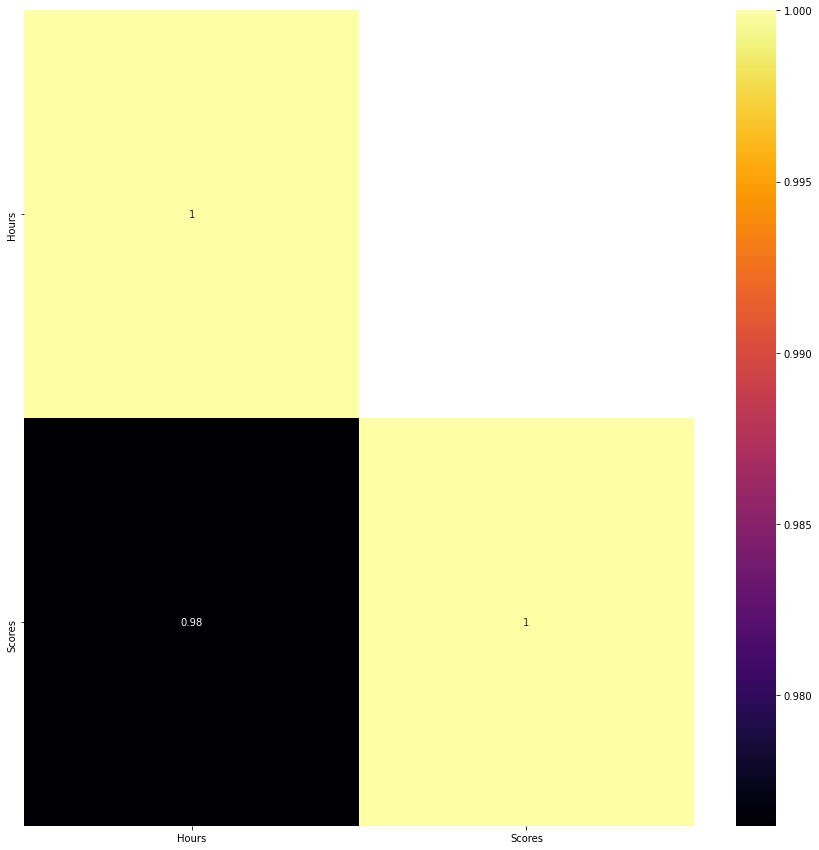

In [18]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,cmap='inferno',mask=np.triu(data.corr(),k=1))


# Mean Absolute Error

In [58]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print(mean_absolute_error(y_test,y_pred))
print(r2_score(y_test,y_pred))



4.18385989900298
0.9454906892105355


# Mean Squared Error

In [52]:
mse=mean_squared_error(y_test,y_pred)
print(mse)

21.598769307217413


In [60]:
print("rmse",np.sqrt(mse))

rmse 4.647447612100368


# Predict if studied 9.25 hours per day

In [55]:
y1_pred=linear.predict([[9.25]])

print('The predicted score if a student for 9.25 hours per day  percentage of the marks would be ',y1_pred)

The predicted score if a student for 9.25 hours per day  percentage of the marks would be  [93.69173249]
